In [100]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

trainin = pd.read_csv('data/train_in.csv', delimiter = ',', header=None)
trainout = pd.read_csv('data/train_out.csv', delimiter = ',', header=None)
testin = pd.read_csv('data/test_in.csv', delimiter = ',', header=None)
testout = pd.read_csv('data/test_out.csv', delimiter = ',', header=None)

In [103]:
trainin['Label'] = trainout
average = trainin.groupby(['Label']).mean()

train = trainin.iloc[:, :-1]
print(train)

      0    1    2      3      4      5      6      7      8      9    ...  \
0    -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862 -0.167  ...   
1    -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853 -1.000  ...   
2    -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -0.996  ...   
3    -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450 -0.067  ...   
4    -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  0.234  ...   
...   ...  ...  ...    ...    ...    ...    ...    ...    ...    ...  ...   
1702 -1.0 -1.0 -1.0 -1.000 -1.000 -0.889  0.497  0.988  0.244 -0.861  ...   
1703 -1.0 -1.0 -1.0 -1.000 -1.000 -0.961 -0.211  0.647  0.464 -0.071  ...   
1704 -1.0 -1.0 -1.0 -1.000 -0.948 -0.307 -0.718 -0.178  0.543  1.000  ...   
1705 -1.0 -1.0 -1.0 -1.000 -1.000 -0.806  0.417  1.000  0.627 -0.559  ...   
1706 -1.0 -1.0 -1.0 -1.000 -0.338  0.637  1.000  0.464  0.428 -0.161  ...   

        246    247    248    249    250    251    252    253    254  255  


In [68]:
def group_and_calc_dist(data, labels, no1, no2):
    """
    Takes data (train or test in) and labels (train or test out) in a dataframe 
    and two numbers. Calculates the distance between the centers of those two numbers.
    """
    data['Label'] = labels
    average = data.groupby(['Label']).mean()
    dist = np.linalg.norm(average.iloc[[no1]].to_numpy() - average.iloc[[no2]].to_numpy())
    
    return dist


for a in range(0, 10):
    for b in range(0, 10):
        print('Number one: ', a, ' Number two: ', b, ' Distance: ', group_and_calc_dist(trainin, trainout, a, b))

Number one:  0  Number two:  0  Distance:  0.0
Number one:  0  Number two:  1  Distance:  14.44960796590658
Number one:  0  Number two:  2  Distance:  9.334555870229643
Number one:  0  Number two:  3  Distance:  9.143733671882783
Number one:  0  Number two:  4  Distance:  10.769844437633486
Number one:  0  Number two:  5  Distance:  7.519296259597183
Number one:  0  Number two:  6  Distance:  8.154443125778972
Number one:  0  Number two:  7  Distance:  11.864555054634078
Number one:  0  Number two:  8  Distance:  9.907901737320392
Number one:  0  Number two:  9  Distance:  11.488874937417041
Number one:  1  Number two:  0  Distance:  14.44960796590658
Number one:  1  Number two:  1  Distance:  0.0
Number one:  1  Number two:  2  Distance:  10.125322577096668
Number one:  1  Number two:  3  Distance:  11.733232901831071
Number one:  1  Number two:  4  Distance:  10.173786431281787
Number one:  1  Number two:  5  Distance:  11.118800407467436
Number one:  1  Number two:  6  Distance:  10

In [69]:
pca = PCA(n_components = 2)
youmap = umap.UMAP()
tsne = TSNE()

tsnereduc = tsne.fit_transform(trainin)
umapreduc = youmap.fit_transform(trainin)
pcareduc = pca.fit_transform(trainin)
print(tsnereduc.shape, pcareduc.shape, umapreduc.shape)

(1707, 2) (1707, 2) (1707, 2)


<AxesSubplot:>

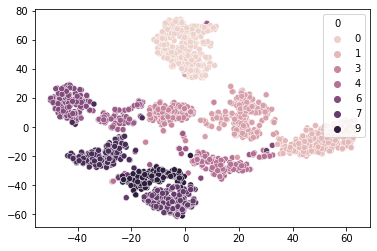

In [70]:
sns.scatterplot(x = tsnereduc[:, 0], y = tsnereduc[:, 1], hue = trainout[0])

<AxesSubplot:>

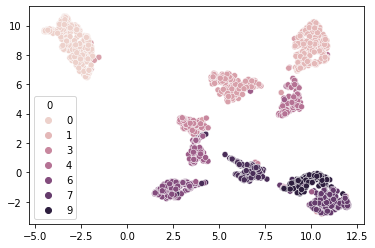

In [71]:
sns.scatterplot(x = umapreduc[:, 0], y = umapreduc[:, 1], hue = trainout[0])

<AxesSubplot:>

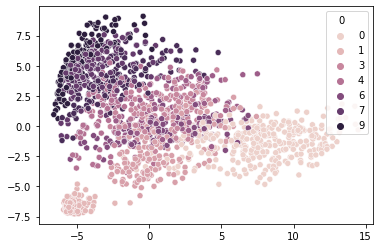

In [72]:
sns.scatterplot(x = pcareduc[:, 0], y = pcareduc[:, 1], hue = trainout[0])

In [89]:
predstest = []
predstrain = []

for index, measure in train.iterrows():
    disttrain = 1000
    notrain = 1000
    for index2, mean in average.iterrows():
        currentdisttr = np.linalg.norm(mean.to_numpy() - measure.to_numpy())
        if currentdisttr < disttrain:
            disttrain = currentdisttr
            notrain = index2
    predstrain.append(notrain)
    
for index, measure in testin.iterrows():
    disttest = 1000
    notest = 1000
    for index2, mean in average.iterrows():
        currentdistte = np.linalg.norm(mean.to_numpy() - measure.to_numpy())
        if currentdistte < disttest:
            disttest = currentdistte
            notest = index2
    predstest.append(notest)
    
traincorrect = 0
testcorrect = 0
traintotal = 0
testtotal = 0
i = 0
j = 0

for pred in predstrain:
    if trainout[0][i] == pred:
        traincorrect += 1
    traintotal += 1
    i += 1
    
for pred in predstest:
    if testout[0][j] == pred:
        testcorrect += 1
    testtotal += 1
    j += 1
    
print("Train percentage correct: ", traincorrect/traintotal*100)
print("Test percentage correct: ", testcorrect/testtotal*100)

Train percentage correct:  86.35032220269478
Test percentage correct:  80.4


In [105]:
knn = KNeighborsClassifier()
knn.fit(trainin.iloc[:, :-1], trainout[0])
predictions = knn.predict(testin)

knncorrect = 0
knntotal = 0
k = 0
for pred in predictions:
    if testout[0][k] == pred:
        knncorrect += 1
    knntotal += 1
    k += 1
print("KNN percentage correct: ", knncorrect/knntotal*100)

KNN percentage correct:  90.8


In [110]:
lbls = [0,1,2,3,4,5,6,7,8,9]
naivematrix = confusion_matrix(predstest, testout[0])
knnmatrix = confusion_matrix(predictions, testout[0])

matrix1 = ConfusionMatrixDisplay(confusion_matrix = naivematrix, display_labels = lbls)
matrix2 = ConfusionMatrixDisplay(confusion_matrix = knnmatrix, display_labels = lbls)

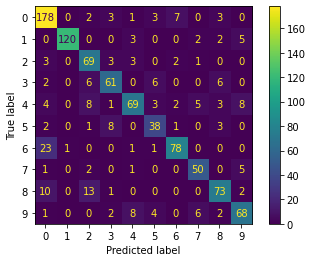

In [112]:
matrix1.plot()

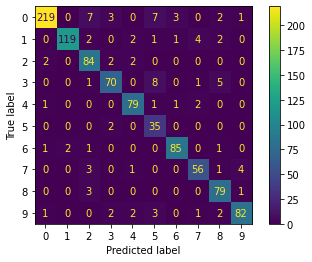

In [113]:
matrix2.plot()